# Utiliser un langage de programmation pour étudier la relation approchée entre la variation du vecteur vitesse d’un système modélisé par un point matériel entre deux instants voisins et la somme des forces appliquées sur celui-ci.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Bille ponctuelle lâchée d'une hauteur $h$ sans vitesse initiale (expérience)
On travaille avec des relevés de positions au cours du temps obtenus à partir du film d'une chute (ex : Regavi)

In [2]:
x0, y0 = 0, 2.4
x = [x0, 0.1, 0.07, -0.02, 0.01, -0.1, -0.04, 0.1]
y = [y0, 2.3, 2.2, 2.0, 1.6, 1.2, 0.6, 0]
t = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7] # liste python "classique"

Text(0.5,1,'hauteur = f(t)')

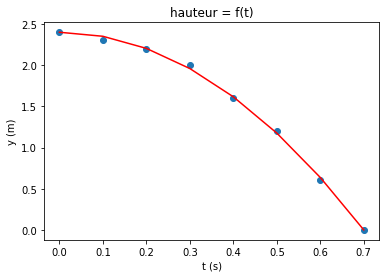

In [3]:
plt.plot(t, y, 'o')
plt.xlabel('t (s)')
plt.ylabel('y (m)')

# modélisation par une chute libre (courbe rouge)
g = 9.8
y_theo = y0 - 0.5 * g * np.array(t)**2 # il faut convertir t en np.array (tableau de numpy)
plt.plot(t, y_theo, color='red')

plt.title('hauteur = f(t)')

Text(0.5,1,'trajectoire')

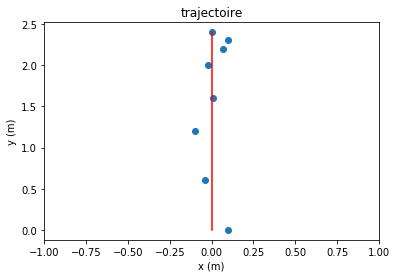

In [4]:
plt.plot(x, y, 'o')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# modélisation par une chute rectiligne (courbe rouge)
plt.axis(xmin=-1, xmax=1) # on "dézoome" pour montrer que la chute est à peu près verticale
plt.plot([0]*8, y_theo, color='red')

plt.title('trajectoire')

### Calcul du vecteur vitesse

$v_{x}[i] = \dfrac{x_{[i+1]} - x_{[i]}} {t_{[i+1]} - t_{[i]}}$

$v_{y}[i] = \dfrac{y_{[i+1]} - y_{[i]}} {t_{[i+1]} - t_{[i]}}$


On donne une valeur nulle (de façon arbitraire !) au dernier point pour v.

In [5]:
def vitesse(x, y, t):
    """ calcul des coordonnées de v """
    vx = []
    for i in range(len(x)-1):
        vx.append((x[i+1] - x[i-1]) / (t[i+1] - t[i-1]))
    vx.append(0)

    vy = []
    for i in range(len(y)-1):
        vy.append((y[i+1] - y[i-1]) / (t[i+1] - t[i-1]))
    vy.append(0)
    return vx, vy

In [6]:
vx, vy = vitesse(x, y, t)

Text(0.5,1,'Vecteur vitesse')

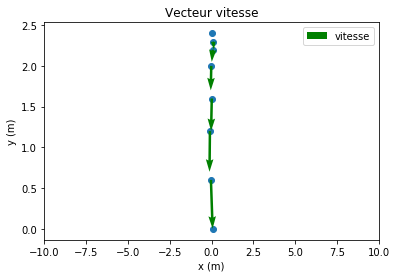

In [7]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.axis(xmin=-10, xmax=10)

# ajout des vecteurs vitesse
#  on exclut le 1er et le dernier point
plt.quiver(x[1:-1], y[1:-1], vx[1:-1], vy[1:-1],  angles='xy', units='dots', scale_units='xy', scale=10, color='green', label='vitesse')
plt.legend()

plt.title('Vecteur vitesse')

### Calcul du vecteur variation de vitesse
$Dv_x[i] = v_x[i+1] - v_x[i]$

$Dv_y[i] = v_y[i+1] - v_y[i]$


On donne une valeur nulle (de façon arbitraire !) au dernier point pour Dv.

In [8]:
def var_vitesse(vx, vy):
    """ calcul des coordonnées de Delta_v """
    Dvx = []
    for i in range(len(vx)-1):
        Dvx.append(vx[i+1] - vx[i-1])
    Dvx.append(0)

    Dvy = []
    for i in range(len(y)-1):
        Dvy.append(vy[i+1] - vy[i-1])
    Dvy.append(0)
    return Dvx, Dvy

In [9]:
Dvx, Dvy = var_vitesse(vx, vy)

Text(0.5,1,'Vecteur variation de vitesse')

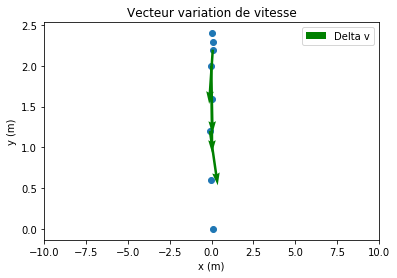

In [10]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.axis(xmin=-10, xmax=10)

# ajout des vecteurs variation de vitesse
# on exclut les 1er et  derniers points
plt.quiver(x[2:-2], y[2:-2], Dvx[2:-2:], Dvy[2:-2],  angles='xy', units='dots', scale_units='xy', scale=3, color='green', label='Delta v')
plt.legend()

plt.title('Vecteur variation de vitesse')

# Mouvement parabolique (théorie)
On considère une bille lancée d'une hauteur $h$, avec un angle $\alpha$ par rapport à l'horizontale, et une vitesse intiale $v_0$.

In [11]:
# hauteur de lancement (m)
h = 5
# angle en degré, puis conversion en radians
alpha = 40
alpha = np.radians(alpha) 
# vitesse initiale (m/s)
v0 = 20
# intensité de la pesanteur (m/s2)
g = 9.8

In [12]:
# création des instants
t = np.linspace(0, 3, 30)

In [13]:
# coordonnées de positions (x, y) en fonction du temps
x = v0 * np.cos(alpha) * t

y = -0.5 * g * t**2 + v0 * np.sin(alpha) * t + h

# équation de la trajectoire
traj = -0.5 * g * (x / (v0 * np.cos(alpha)))**2 + np.tan(alpha) * x + h

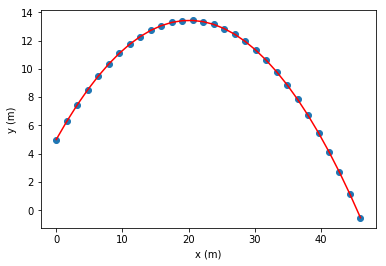

In [14]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.plot(x, traj, 'red')

### Tracer des vecteurs vitesse
On reprend les données précédentes du mouvement parabolique.

Text(0.5,1,'Vecteur vitesse')

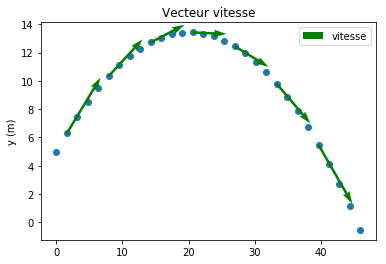

In [15]:
vx, vy = vitesse(x, y, t)

plt.scatter(x, y)
plt.ylabel('y (m)')

# ajout des vecteurs vitesse
# on ne conserve qu'un point sur 4 (pour la lisibilité), et on exclut le 1er et le dernier point
plt.quiver(x[1:-1:4], y[1:-1:4], vx[1:-1:4], vy[1:-1:4], angles='xy', units='dots', scale_units='xy', scale=3, color='green', label='vitesse')
plt.legend()
plt.title('Vecteur vitesse')

### Tracé du vecteur variation de vitesse

Text(0.5,1,'Vecteur variation de vitesse')

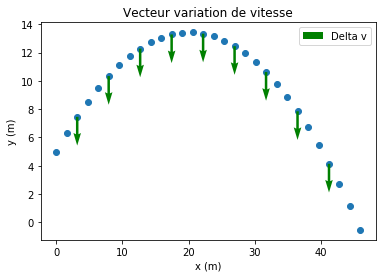

In [16]:
Dvx, Dvy = var_vitesse(vx, vy)

plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

# ajout des vecteurs variation de vitesse
# on ne conserve qu'un point sur 3 (pour la lisibilité), et on exclut le 1er et le dernier point
plt.quiver(x[2:-2:3], y[2:-2:3], Dvx[2:-2:3], Dvy[2:-2:3], angles='xy', units='dots', scale_units='xy', scale=1, color='green', label='Delta v')
plt.legend()
plt.title('Vecteur variation de vitesse')

# Mouvement circulaire : plot paramétrique

In [17]:
t = np.linspace(0, 2*np.pi, 36)

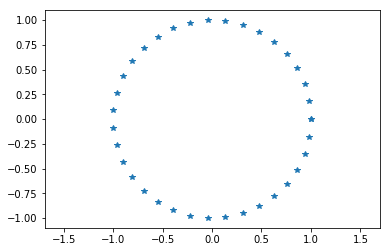

In [18]:
x = np.cos(t)
y = np.sin(t)

plt.axis('equal')

plt.plot(x, y, '*')

Text(0.5,1,'Vecteur vitesse')

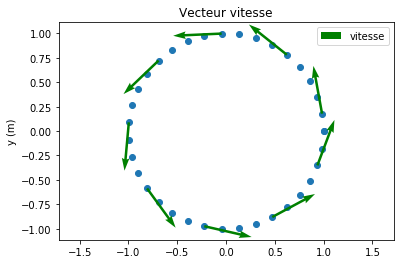

In [19]:
vx, vy = vitesse(x, y, t)

plt.scatter(x, y)
plt.ylabel('y (m)')

plt.axis('equal')

# ajout des vecteurs vitesse
# on ne conserve qu'un point sur 4 (pour la lisibilité), et on exclut le 1er et le dernier point
plt.quiver(x[1:-1:4], y[1:-1:4], vx[1:-1:4], vy[1:-1:4], angles='xy', units='dots', scale_units='xy', scale=2, color='green', label='vitesse')
plt.legend()
plt.title('Vecteur vitesse')

Text(0.5,1,'Vecteur variation de vitesse')

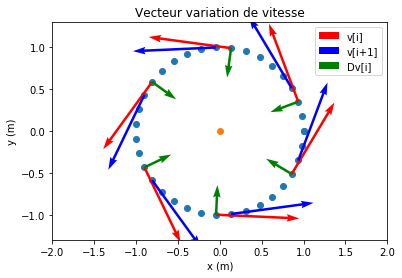

In [20]:
Dvx, Dvy = var_vitesse(vx, vy)

plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

plt.scatter(0, 0)

plt.axis('equal')
plt.axis(xmin=-2, xmax=2, ymin=-2, ymax=2) # pour voir les fleches vitesses

# ajout des vecteurs vitesses, par "paires de points", par pas de 6
plt.quiver(x[2:-1:6], y[2:-1:6], vx[2:-1:6], vy[2:-1:6], angles='xy', units='dots', scale_units='xy', scale=1, color='red', label='v[i]')
plt.quiver(x[3:-1:6], y[3:-1:6], vx[3:-1:6], vy[3:-1:6],  angles='xy', units='dots', scale_units='xy', scale=1, color='blue', label='v[i+1]')

# ajout des vecteurs variation de vitesse, au point milieu entre 2 vecteurs vitesses
# on conserve la même échelle (scale = 1) pour tracer v et Dv
plt.quiver(x[2:-1:6], y[2:-1:6], Dvx[2:-1:6], Dvy[2:-1:6], angles='xy', units='dots', scale_units='xy', scale=1, color='green', label='Dv[i]')
plt.legend()
plt.title('Vecteur variation de vitesse')